EXPLORATORY DATA ANALYSIS ON DATASET GLOBAL TERRORISM
@GRIP THE SPARKS FOUNDATION
THIS NOTEBOOK HELP IN FIND HOT ZONES OF TERRORISM AND HELP IN FINDING 
THE SECURITY ISSUES AND INSIGHTS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df1=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

C:\Users\lenovo\AppData\Local\Temp\ipykernel_56640\3845213661.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")


In [39]:
df.shape

(181691, 14)

In [47]:
for cols in df.columns:
    print(cols)
    print(df[cols].value_counts())

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64
Month
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64
Day
15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011

In [11]:
df.drop(['eventid','imonth','iday','approxdate','latitude','approxdate','longitude','specificity','location','summary','alternative_txt','attacktype2_txt','gsubname','gname2','gsubname2','gname3','gsubname3','motive','claimmode_txt','claimmode2','claimmode','claimmode2_txt','claimmode3','claim3','claimmode3_txt','claim3','weapsubtype1','weapsubtype2','weapsubtype3','related','addnotes','nreleased','hostkidoutcome','ransomnote','ransompaidus','ransompaid','ransomamtus','ransomamt','kidhijcountry','divert','propcomment','propextent_txt','weapdetail','weapsubtype4_txt','weapsubtype4','weaptype4','weaptype4_txt','weapsubtype3','weaptype3','weapsubtype2','weaptype2','weapsubtype1','weaptype1'],axis=1,inplace=True)

In [18]:
df.head()

,iyear,extended,country,country_txt,region_txt,provstate,city,vicinity,crit1,crit2,...,ransom,hostkidoutcome_txt,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,0,58,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,0,1,1,...,0.0,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
1,1970,0,130,Mexico,North America,Federal,Mexico city,0,1,1,...,1.0,NaN,NaN,NaN,NaN,PGIS,0,1,1,1
2,1970,0,160,Philippines,Southeast Asia,Tarlac,Unknown,0,1,1,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,1970,0,78,Greece,Western Europe,Attica,Athens,0,1,1,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,1970,0,101,Japan,East Asia,Fukouka,Fukouka,0,1,1,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [15]:
df.drop(['resolution','region','attacktype2','attacktype3','attacktype3_txt','corp1','natlty1','targtype2','targsubtype2','targtype1','targsubtype1','corp2','natlty2','targtype2','targsubtype2','targsubtype3','corp3','natlty3'],axis=1,inplace=True)

In [55]:
df.describe()

,Year,Month,Day,INT_LOG,ransom
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,-4.543731,-0.062100
std,13.259430,3.388303,8.814045,4.543547,0.791544
min,1970.000000,0.000000,0.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,-9.000000,0.000000
50%,2009.000000,6.000000,15.000000,-9.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000


In [21]:
#country_txt,region_txt,city
df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

In [25]:
df=df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                             'provstate':'State','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type',
                             'targsubtype1_txt':'Target_subtype','gname':'Gang_name','weaptype1_txt':'Weapon_type'})

In [26]:
df=df[['Year','Month','Day','Country','Region','State','City','Attack_type','Target_type','Target_subtype','Gang_name','Weapon_type']]

In [30]:
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_type,Target_type,Target_subtype,Gang_name,Weapon_type,INT_LOG,ransom
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,MANO-D,Unknown,0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",23rd of September Communist League,Unknown,0,1.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Unknown,Unknown,-9,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,Unknown,Explosives,-9,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,Unknown,Incendiary,-9,0.0


In [29]:
df['INT_LOG']=df1['INT_LOG']
df['ransom']=df1['ransom']

In [41]:
df.isna().sum()

Year              0
Month             0
Day               0
Country           0
Region            0
State             0
City              0
Attack_type       0
Target_type       0
Target_subtype    0
Gang_name         0
Weapon_type       0
INT_LOG           0
ransom            0
dtype: int64

In [67]:
for cols in df.columns:
    print(cols)
    print(df[cols].value_counts())

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64
Month
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: Month, dtype: int64
Day
15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011

In [36]:
#nba["College"].fillna("No College", inplace = True)
df['State'].fillna('Not Known',inplace=True)

In [37]:
df['City'].fillna('City',inplace=True)

In [38]:
df['Target_subtype'].fillna('Not known',inplace=True)

In [40]:
df['ransom'].fillna(0,inplace=True)

In [42]:
df.State.value_counts()

Baghdad                  7645
Northern Ireland         4498
Unknown                  4290
Balochistan              3710
Saladin                  3411
                         ... 
Federal Territory           1
Topaz (Province)            1
Obilic (Municipality)       1
East Timor (Region)         1
Vidzeme                     1
Name: State, Length: 2856, dtype: int64

In [46]:
df.State.unique()

array(['Not Known', 'Federal', 'Tarlac', ..., 'Carlow', 'Western Lakes',
       'Vidzeme'], dtype=object)

<Axes: xlabel='Region', ylabel='count'>

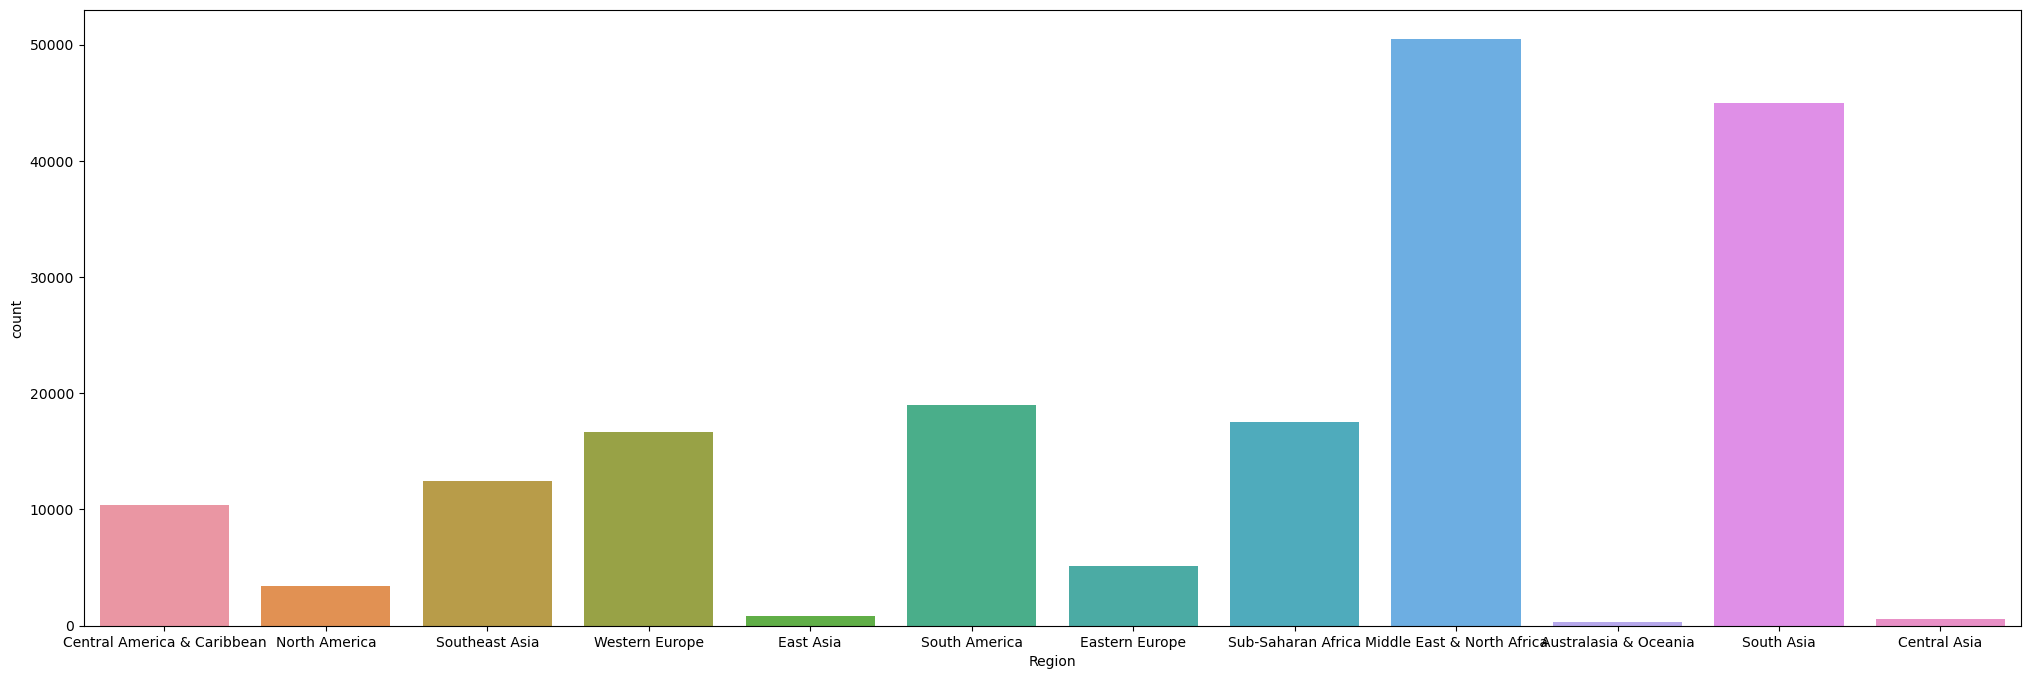

In [59]:
#Region
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 8)
sns.countplot(x='Region',data=df)

#HOT REGIONS OF TERRISIOM ARE MIDDLE EAST & NORTH AMERICA, SOUTH ASIA

In [54]:
df.City.value_counts()

Unknown                     9775
Baghdad                     7589
Karachi                     2652
Lima                        2359
Mosul                       2265
                            ... 
Sbet                           1
Sukirin                        1
Dehiattakandiya district       1
Oued-Djemaa                    1
Kubentog                       1
Name: City, Length: 36675, dtype: int64

<Axes: xlabel='Year', ylabel='count'>

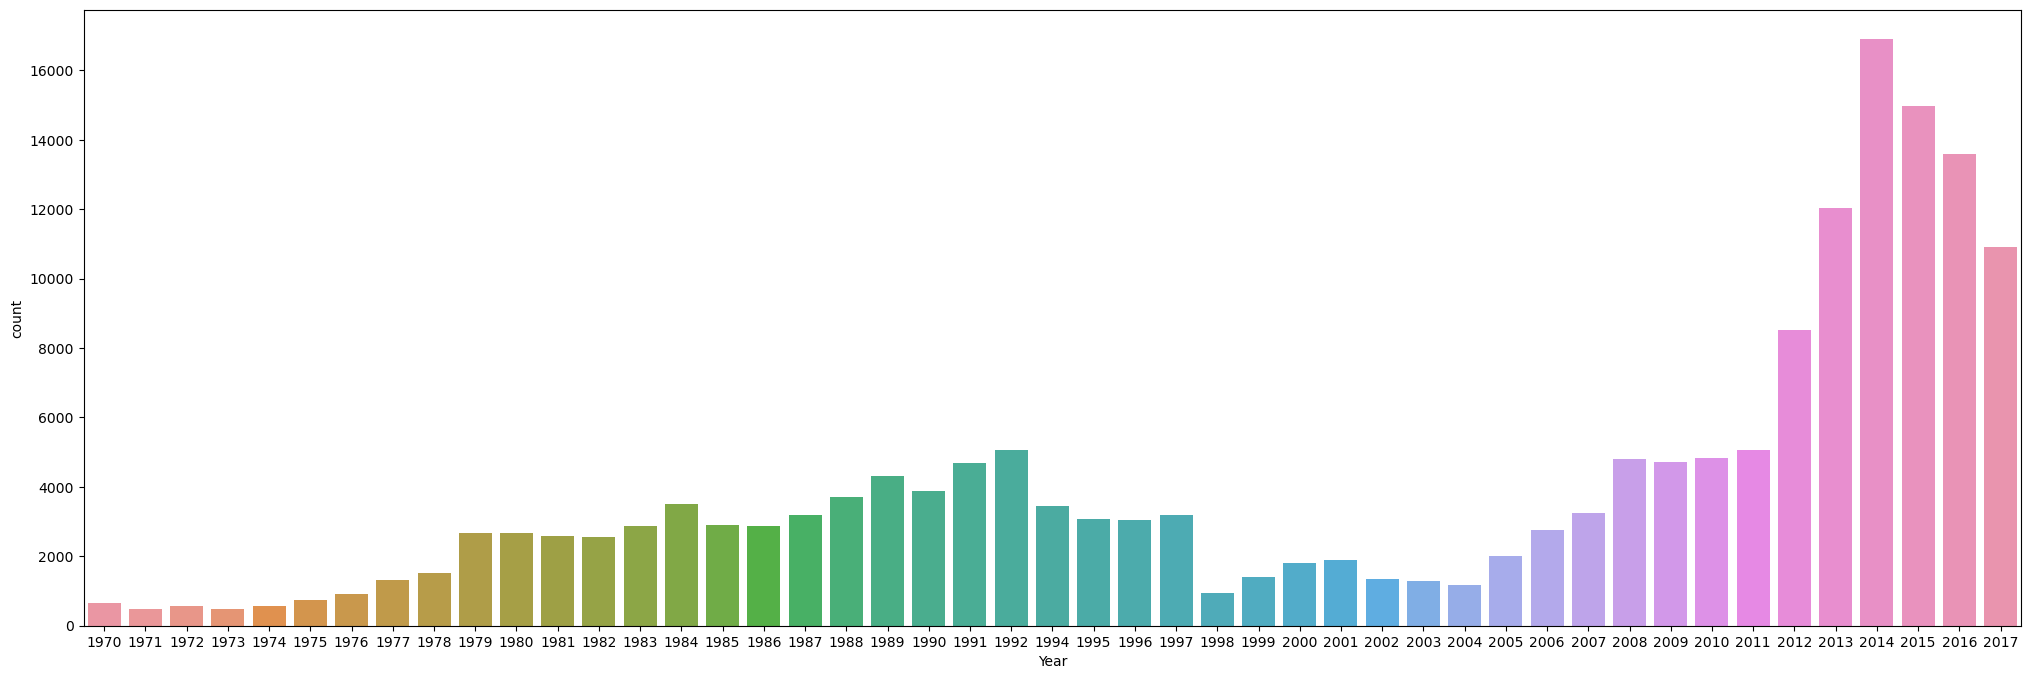

In [61]:
#Region
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(25, 8)
sns.countplot(x='Year',data=df)

#TERRORISM WAS HIGHEST IN YEAR 2014 AFTER WHICH IT IS DECLINING WHICH IS A GOOD SIGN

<Axes: xlabel='Attack_type', ylabel='count'>

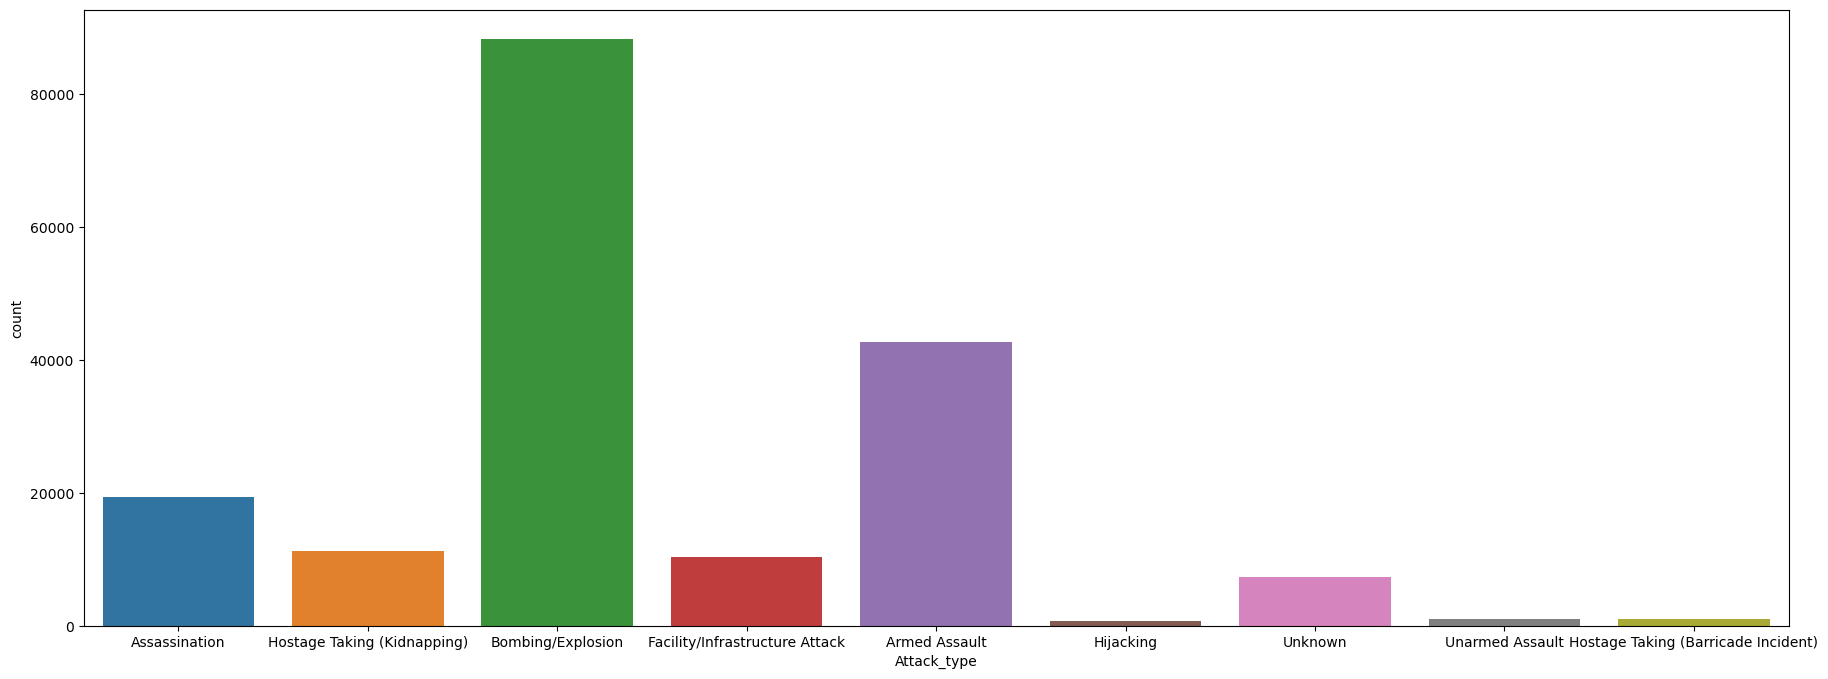

In [66]:
#Attack_type
#Region
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(22, 8)
sns.countplot(x='Attack_type',data=df)

#THE MAIN TYPE OF ATTACK BY TERRORIST ID BOMBING/EXPLOSION

<Axes: xlabel='Target_type', ylabel='count'>

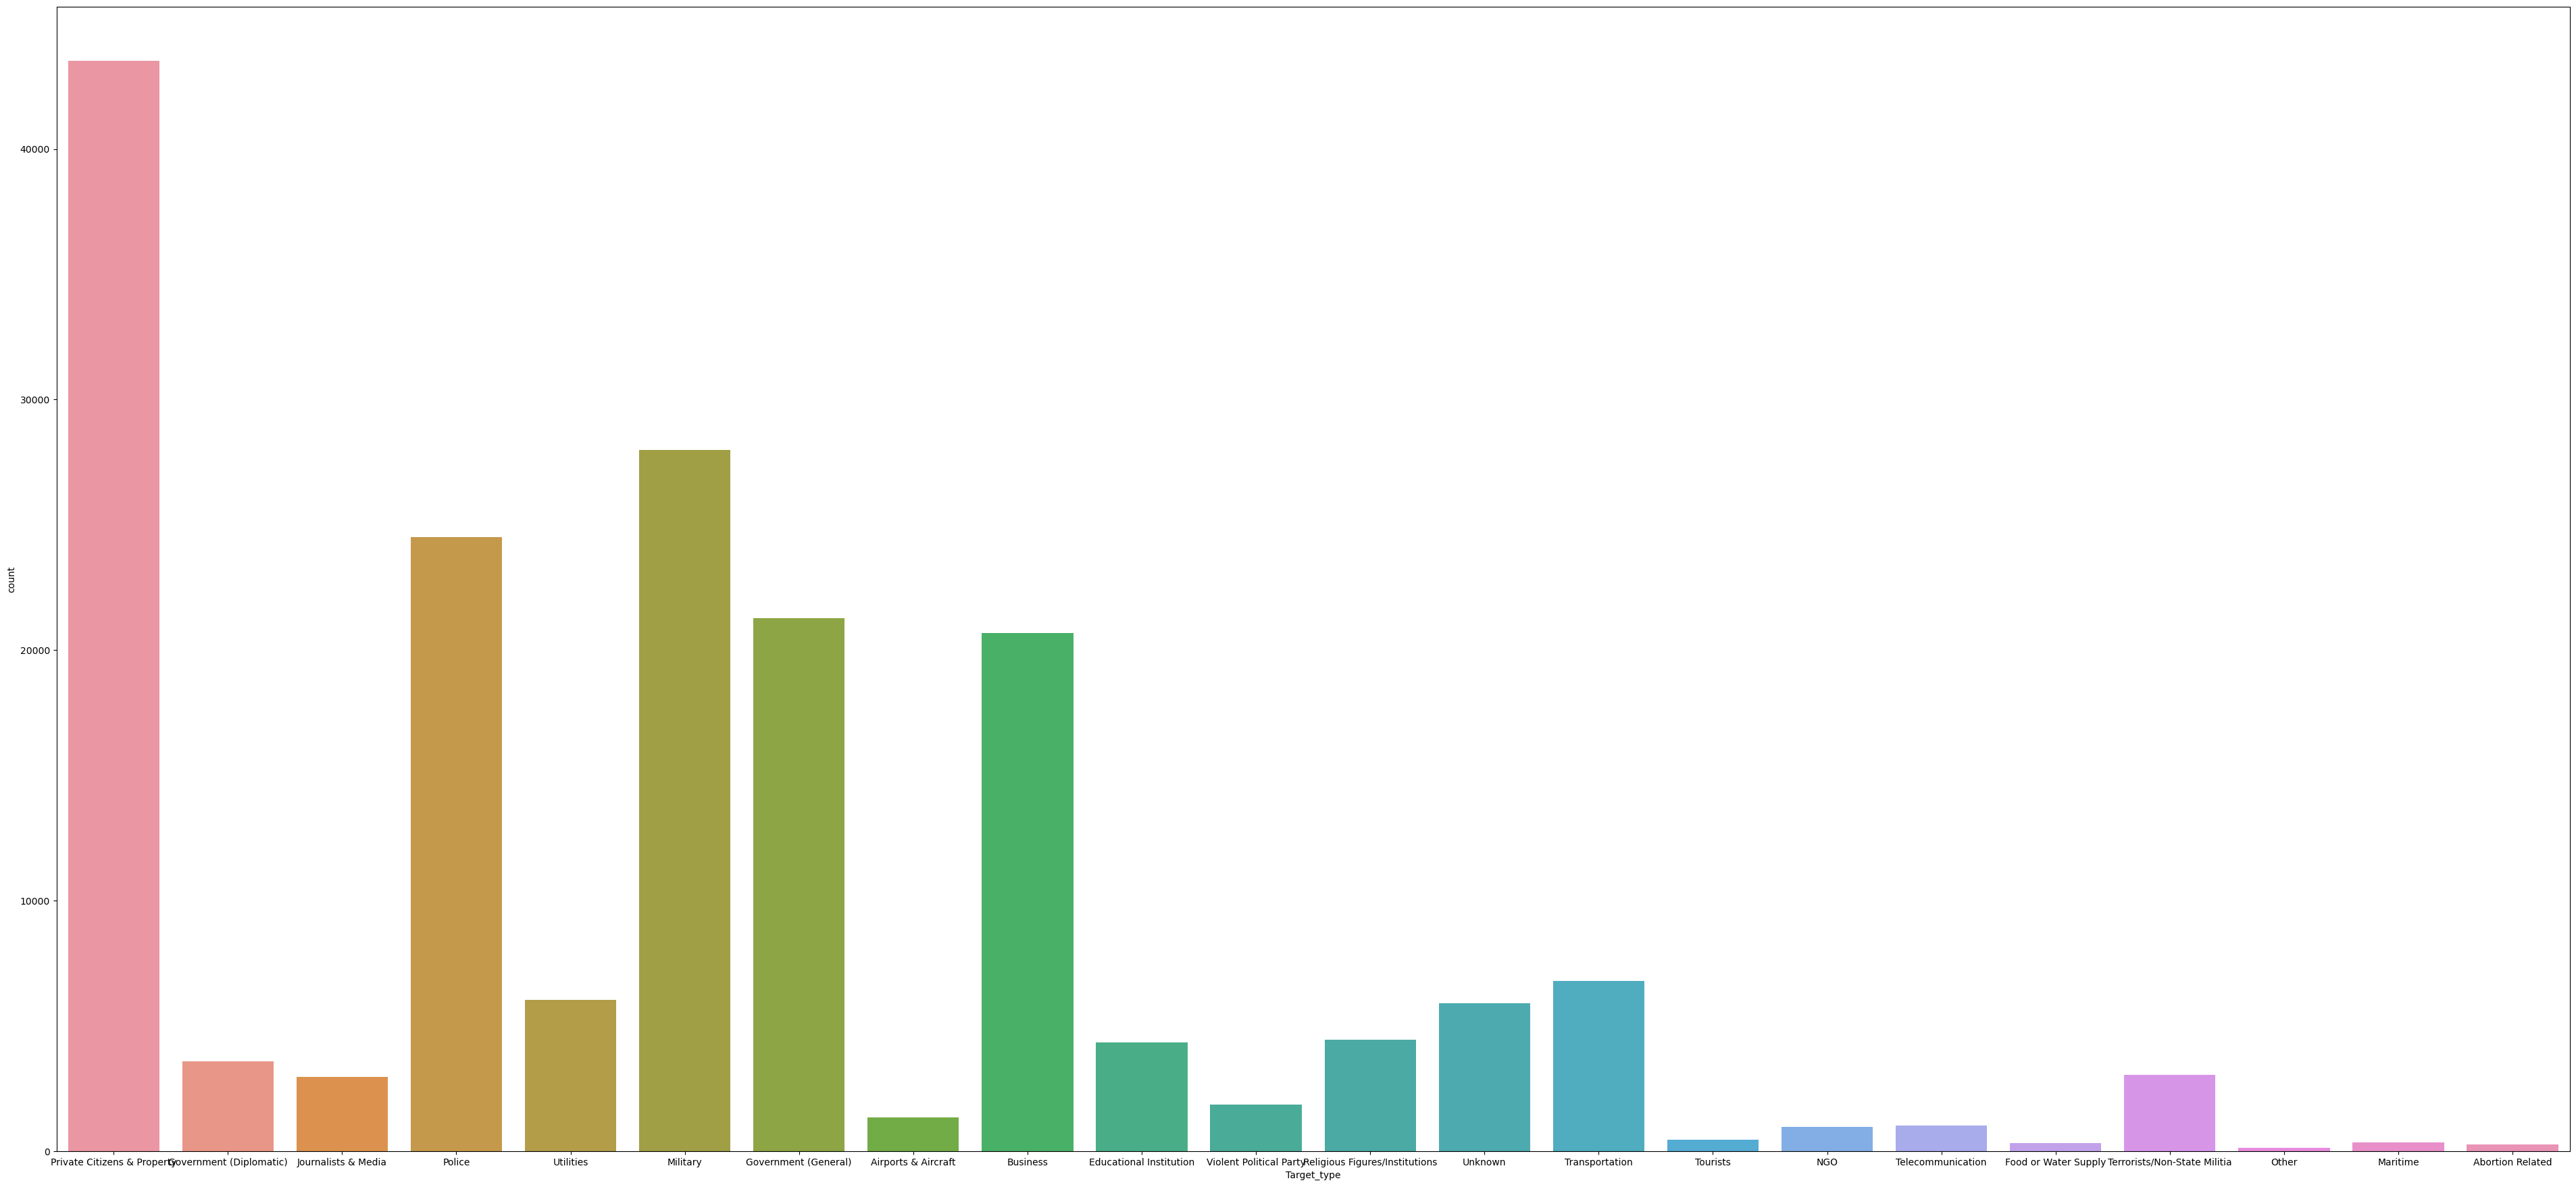

In [74]:
#Target_type

#Attack_type
#Region
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(48, 22)
sns.countplot(x='Target_type',data=df)

#THE MAIN TARGETS OF TERRORISTS ARE PRIVATE CITIZENS AND PROPERTY,POLICE,MILITARY,GOVERNMENT AND BUSINESS

<Axes: xlabel='Weapon_type', ylabel='count'>

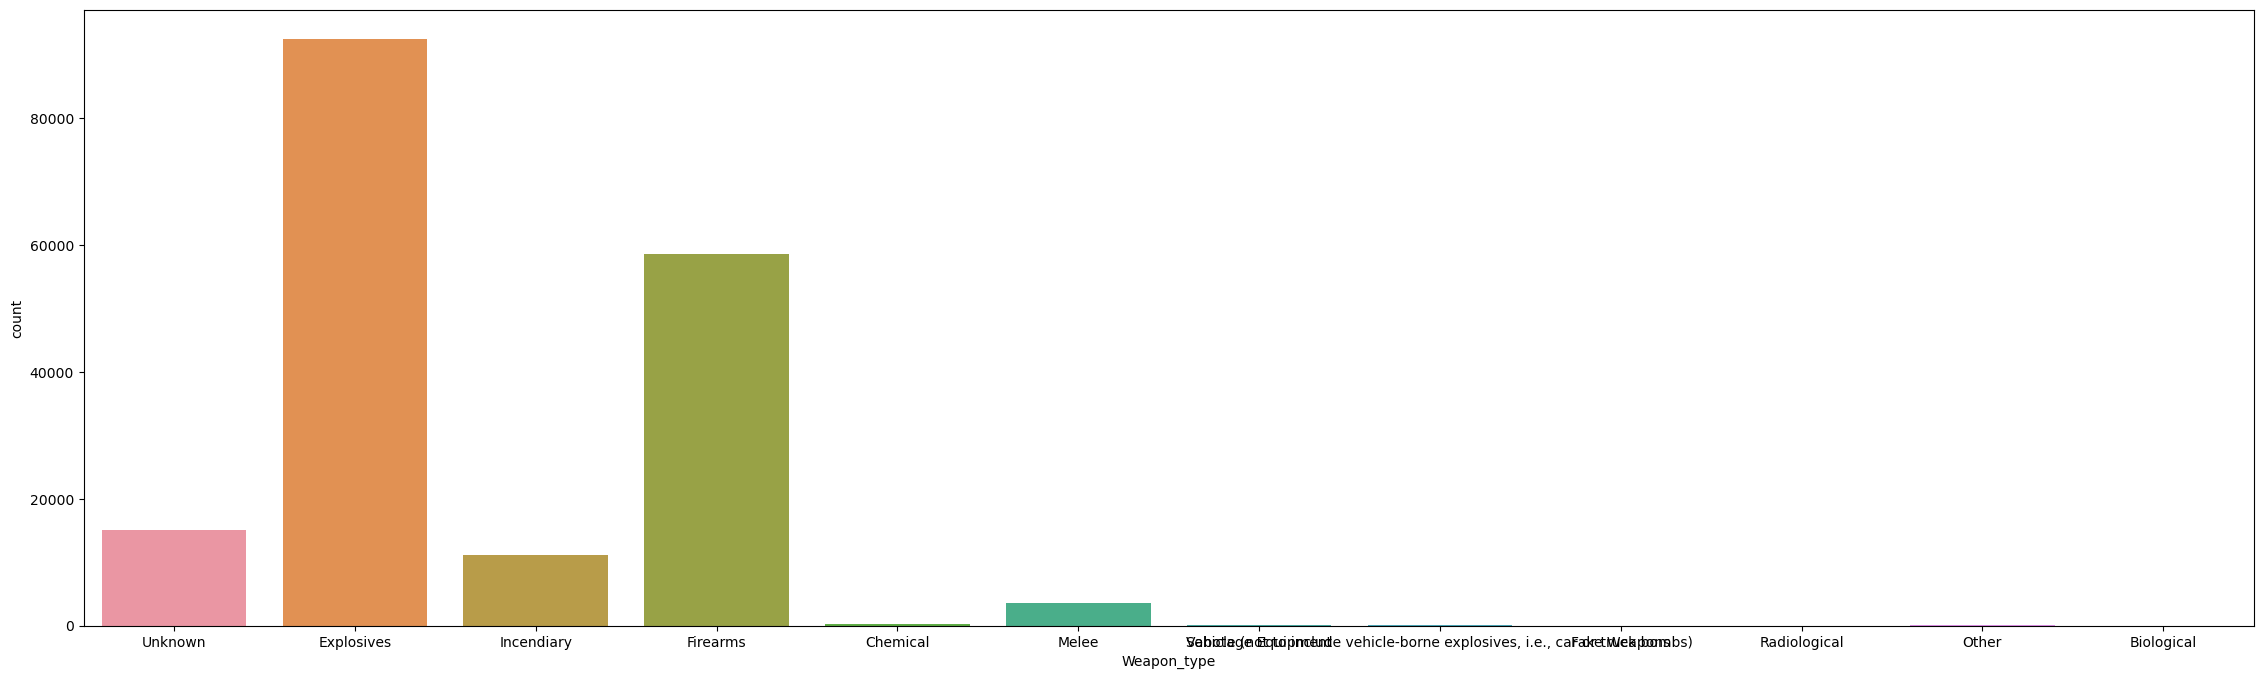

In [77]:
#Weapon_type


fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(28, 8)
sns.countplot(x='Weapon_type',data=df)

#EXPLOSIVES AND FIREARMS ARE THE MAIN WEAPONS OF TERRORISM